# Derivative of Matrix

## import library

In [126]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

In [127]:
I = img.imread('./download.jpeg')

## check the size of image

In [128]:
n_row = I.shape[0]
n_col = I.shape[1]

print(I.shape)

(574, 560)


## convert the input image into gray scale if it is color

In [129]:
try:
    if I.shape[2] == 3:
        weights = np.c_[0.2989, 0.5870, 0.1140]
        tile = np.tile(weights, reps=(n_row, n_col, 1))
        I = np.sum(tile*I, axis=2)
        
except IndexError:
    print()

## normalize input image so that the range of image is $[0, 1]$

In [130]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

# I = (I - np.min(I)) / np.ptp(I)
I = scale(I, 0, 1)

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [131]:
Dx = np.zeros((n_col, n_col), dtype=int)
for row in range(n_col):
    for col in range(n_col):
        if row == col:
            Dx[row][col] = -1
        elif row == col+1:
            Dx[row][col] = 1

## compute the derivative of $I$ with respect to $x$-direction

In [132]:
Ix = I.dot(Dx)

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [133]:
Dy = np.zeros((n_row, n_row), dtype=int)
for row in range(n_row):
    for col in range(n_row):
        if row == col:
            Dy[row][col] = -1
        elif row+1 == col:
            Dy[row][col] = 1

## compute the derivative of $I$ with respect to $y$-direction

In [134]:
Iy = Dy.dot(I) 

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [135]:
norm_gradient = np.square(Ix) + np.square(Iy)

## define functions for the visualization

In [136]:
def plot_image(I):
    
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap='gray')
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Ix, cmap='gray', interpolation='nearest', norm=colors.LogNorm())
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, cmap='gray', interpolation='nearest', norm=colors.LogNorm())
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, cmap='gray', interpolation='nearest',norm=colors.LogNorm())
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

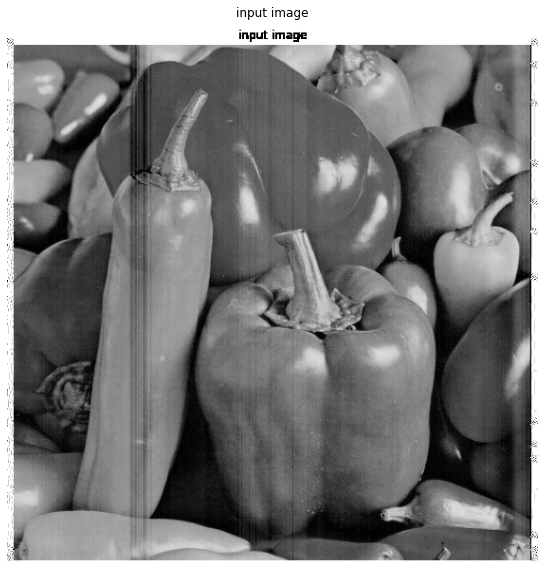

In [137]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

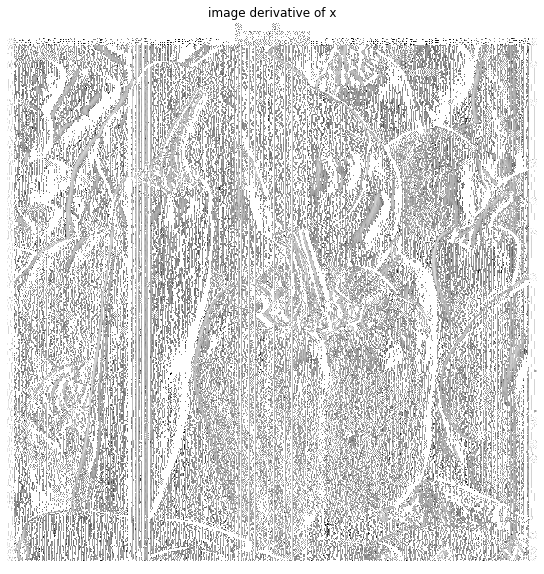

In [138]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

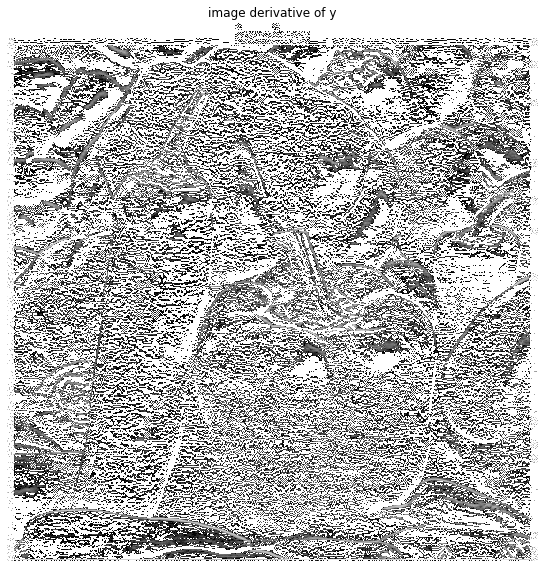

In [139]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

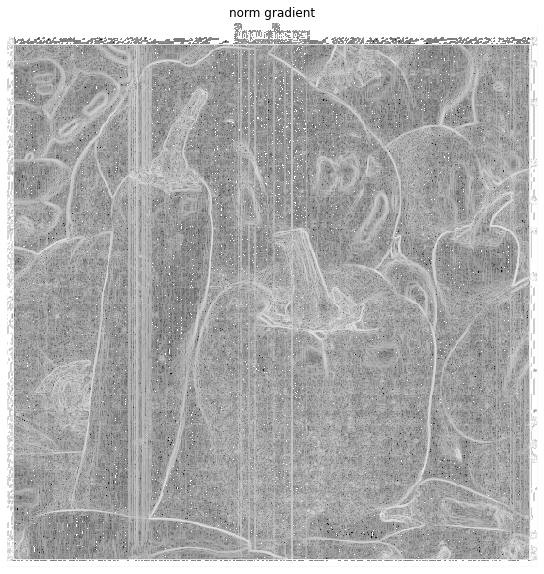

In [140]:
plot_norm_gradient(norm_gradient)